# Diamond Price Prediction

# Problem Statement

The objective of this project is to develop a predictive model that accurately estimates the price of diamonds based on their various features. The dataset contains information about diamonds, including their carat, cut, color, clarity, and dimensions.
The goal is to build a machine learning model that can take these features as input and predict the price of diamonds with a high level of accuracy. This model will assist *jewelers, buyers, and sellers* in determining the appropriate price range for diamonds based on their characteristics, enabling them to make informed decisions during transactions.

The project will involve data preprocessing, exploratory data analysis, feature engineering, and the development and evaluation of predictive models. The model's performance will be assessed using appropriate evaluation metrics, such as root mean squared error or mean absolute percentage error, to measure the accuracy of the price predictions.

The successful completion of this project will provide a valuable tool for the diamond industry, facilitating pricing decisions and improving transparency in the market.

In [1]:
#Importing relevant libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
from sklearn import metrics
import statsmodels.api as sm
import plotly.express as px #for plotting the scatter plot
#For plotting the dataset in seaborn
sns.set(style='whitegrid')
import warnings #to remove the warnings
warnings.filterwarnings('ignore')

In [4]:
#uploading the data set

df = pd.read_csv("Diamond.csv")

In [5]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


# Data Description

Content and meaning of each column in the data is as below:

price - diamond price in US dollars and target variable (continuous)

carat - weight of the diamond (continuous)

cut - quality of cut (categorical)

color - diamond color (categorical)

clarity - measure of flawless or how clear the diamond is (categorical)

depth - total depth percentage estimated by formulas (continuous)

table - width of top of the diamond relative to widest point (continuous)

x - lenghth in mm (continuous)

y - width in mm (continuous)

z - depth in mm (continuous)


# Exploratory Data Analysis

In [6]:
#checking first five rows of the data set

df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
#checking last 5 rows of the data set

df.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [8]:
#checking the shape

df.shape

(53940, 10)

There are total 53,940 rows and 10 columns in the data set

In [9]:
#checking information about the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [10]:
#getting data's description

df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [11]:
#all the columns present in the data set

df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [12]:
#all data types

df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [13]:
#Checking for duplicates

df.loc[df.duplicated(keep='first')]

,carat,cut,color,clarity,depth,table,price,x,y,z
1005,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1006,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1007,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1008,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
2025,1.52,Good,E,I1,57.3,58.0,3105,7.53,7.42,4.28
...,...,...,...,...,...,...,...,...,...,...
47969,0.52,Ideal,D,VS2,61.8,55.0,1919,5.19,5.16,3.20
49326,0.51,Ideal,F,VVS2,61.2,56.0,2093,5.17,5.19,3.17
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.00
50079,0.51,Ideal,F,VVS2,61.2,56.0,2203,5.19,5.17,3.17


We can see 146 duplicate rows

In [14]:
#Removing duplicate rows

df = df.drop_duplicates()

In [15]:
df.shape

(53794, 10)

We can see we have dropped 146 rows

In [16]:
#dividing data into categorical and numerical

X_num = df.select_dtypes(include = np.number)
X_cat = df.select_dtypes(exclude = np.number)

In [17]:
#checking counts of the values

X_cat.value_counts

<bound method DataFrame.value_counts of              cut color clarity
0          Ideal     E     SI2
1        Premium     E     SI1
2           Good     E     VS1
3        Premium     I     VS2
4           Good     J     SI2
...          ...   ...     ...
53935      Ideal     D     SI1
53936       Good     D     SI1
53937  Very Good     D     SI1
53938    Premium     H     SI2
53939      Ideal     D     SI2

[53794 rows x 3 columns]>

# Outliars

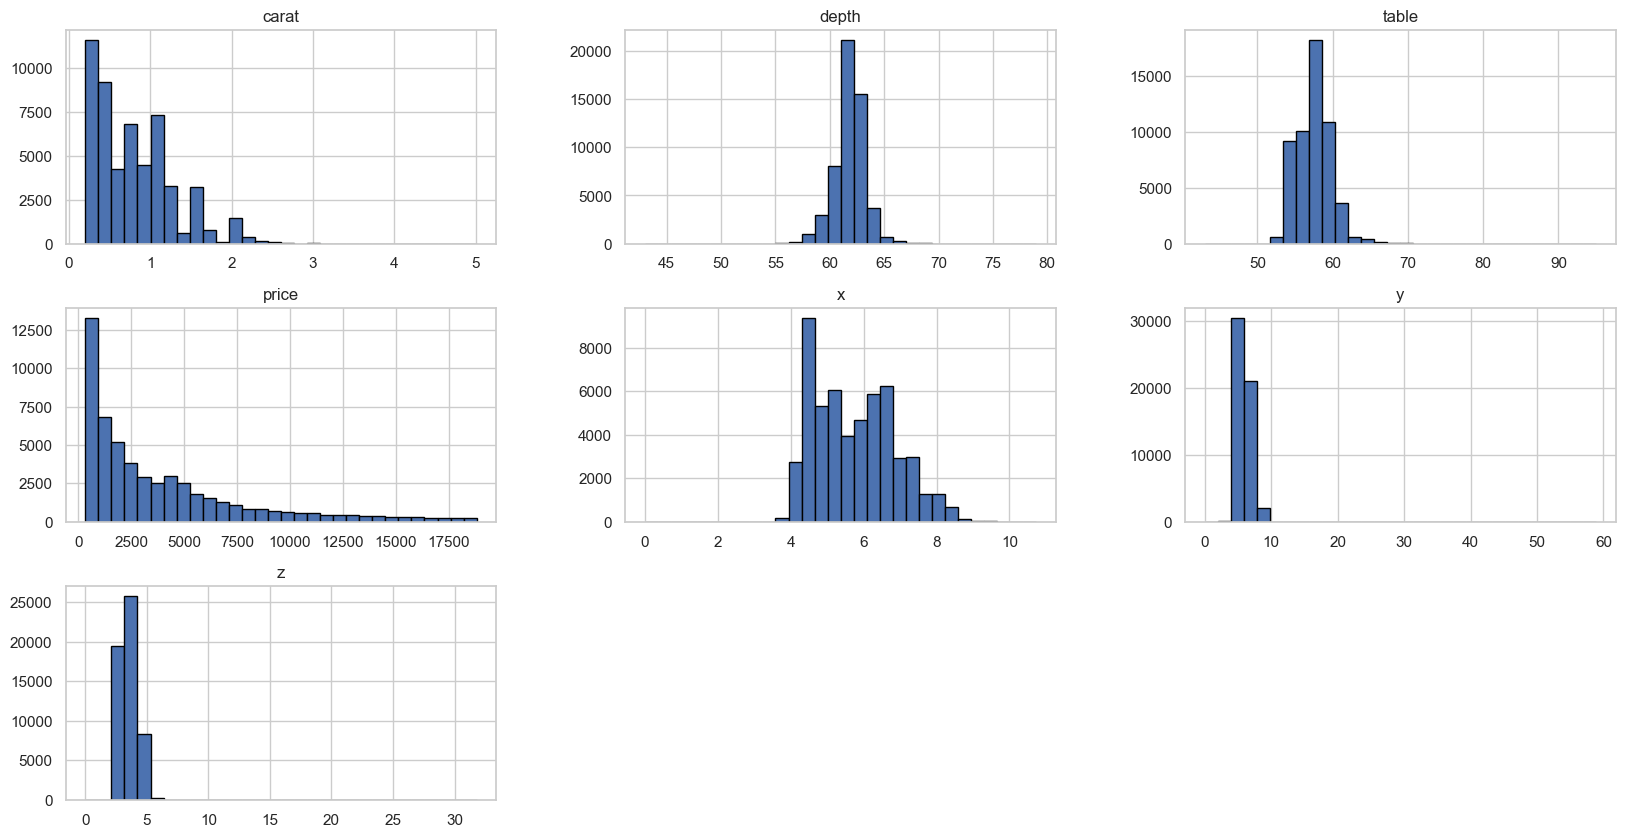

In [18]:
#checking for outliars

df.hist(figsize=(20,10), bins = 30, edgecolor = 'black')
plt.show()

In [19]:
# filter the numeric variables from the data

df_num = df.select_dtypes(include = np.number)

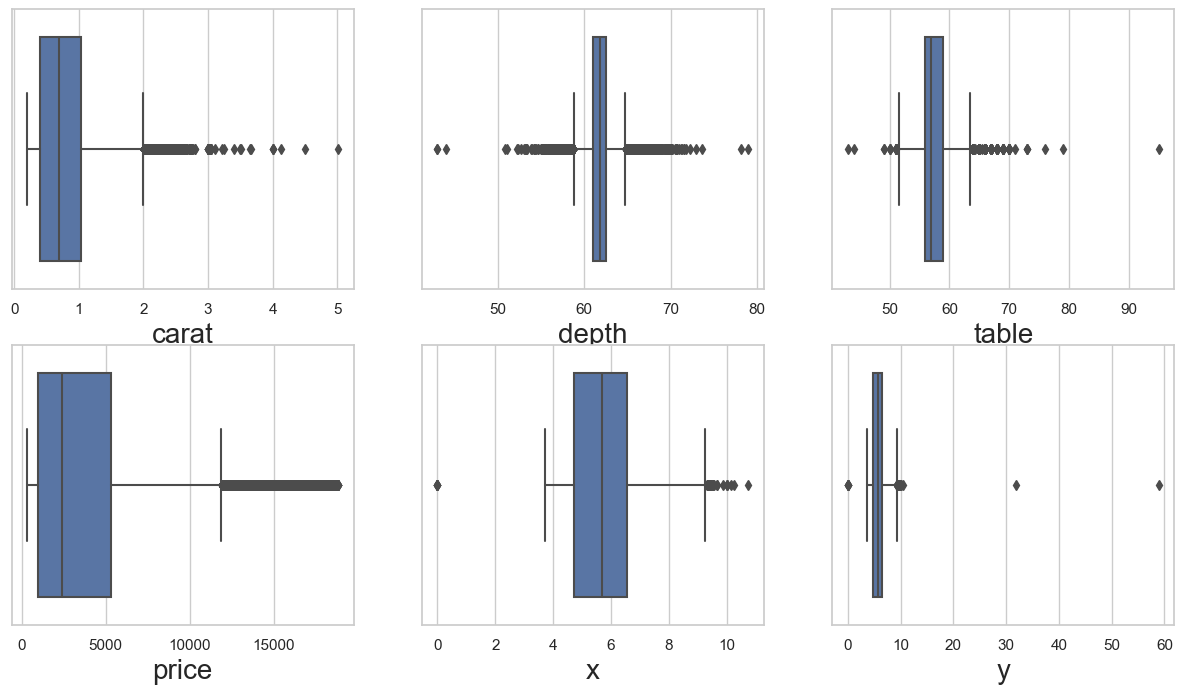

In [20]:
# plot the boxplot for each variable
# subplots(): plot subplots
# figsize(): set the figure size

fig, ax = plt.subplots(2, 3, figsize=(15, 8))

# plot the boxplot using boxplot() from seaborn
# z: let the variable z define the boxplot
# x: data for which the boxplot is to be plotted
# orient: "h" specifies horizontal boxplot (for vertical boxplots use "v")
# whis: proportion of the IQR past the low and high quartiles to extend the plot whiskers
# ax: specifies the axes object to draw the plot onto
# set_xlabel(): set the x-axis label
# fontsize: sets the font size of the x-axis label


for variable, subplot in zip(df_num.columns, ax.flatten()):
    z = sns.boxplot(x = df_num[variable], orient = "h",whis=1.5 , ax=subplot) # plot the boxplot
    z.set_xlabel(variable, fontsize = 20)                                     # set the x-axis label

We can see alot of outliars in multiple columns

In [21]:
df.mean()

carat       0.797780
depth      61.748080
table      57.458109
price    3933.065082
x           5.731214
y           5.734653
z           3.538714
dtype: float64

In [22]:
df.median()

carat       0.70
depth      61.80
table      57.00
price    2401.00
x           5.70
y           5.71
z           3.53
dtype: float64

We can see price column has outliars.

In [23]:
#Removing outliars

#removing outliers with IQR 

q1 = np.quantile(df.price, 0.25) #1st quantile
q2 = np.quantile(df.price, 0.5) #2nd quantile
q3 = np.quantile(df.price, 0.75) #3rd quantile
IQR = q3 - q1 #Inter - Quartile Range

In [24]:
IQR

4375.75

In [25]:
#setting the fences on our dataset to identify the outliers

lower = q1 - (1.5*IQR) #lower whisker
upper = q3 + (1.5*IQR) #upper whisker

In [26]:
#removal of lower and upper outliers in our data

df = df[~((df.price > upper) | (df.price < lower))]


In [27]:
df.shape

(50271, 10)

We now have 50271 rows and 10 columns

# Missing values

In [28]:
#to see if any columns has empty cells

for column in df:
    print(" Number of empty cells in {} is {} ". format(column, (df[column]=="").sum()))

 Number of empty cells in carat is 0 
 Number of empty cells in cut is 0 
 Number of empty cells in color is 0 
 Number of empty cells in clarity is 0 
 Number of empty cells in depth is 0 
 Number of empty cells in table is 0 
 Number of empty cells in price is 0 
 Number of empty cells in x is 0 
 Number of empty cells in y is 0 
 Number of empty cells in z is 0 


In [29]:
#finding the number of zeros in each column

for column in df:
    print(("Number of zeros in {} is {}".format(column,(df[column]==0).sum())))

Number of zeros in carat is 0
Number of zeros in cut is 0
Number of zeros in color is 0
Number of zeros in clarity is 0
Number of zeros in depth is 0
Number of zeros in table is 0
Number of zeros in price is 0
Number of zeros in x is 4
Number of zeros in y is 3
Number of zeros in z is 11


From the above table also we see that x (length), y(breadth) and z(depth) have zero as these minimum value. So we need to remove these entries with 0s using the code below. Good news is that there are no empty cells.

In [30]:
#dropping all zero values from x,y and z columns
df = df[(df[['x','y','z']] != 0).all(axis=1)]

In [31]:
#to check the minimum values of x,y and z
df.describe()

,carat,depth,table,price,x,y,z
count,50260.000000,50260.000000,50260.000000,50260.000000,50260.000000,50260.000000,50260.000000
mean,0.723668,61.754640,57.422531,3161.074055,5.583745,5.586968,3.449377
std,0.383513,1.427651,2.228079,2765.779340,0.992945,0.992362,0.628034
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.380000,61.100000,56.000000,911.000000,4.670000,4.680000,2.880000
50%,0.700000,61.800000,57.000000,2157.500000,5.590000,5.580000,3.430000
75%,1.010000,62.500000,59.000000,4670.000000,6.430000,6.420000,3.980000
max,3.650000,79.000000,79.000000,11888.000000,9.540000,31.800000,31.800000


In [32]:
df.shape

(50260, 10)

We have dropped 11 rows

# Encoding categorical variables using Ordinal Encoding

As we know, in our dataset, the columns cut, clarity and colour have non numerical entries. These features or predictors are called as categorical variables as they put the variable entries in various categories. Like in our example, predictor cut has various categories like Ideal, Premium and Good. To deal with categorical entries, techniques like one hot encoding, dummy coding, label encoding etc can be used. In this implementation, built in methods are not used. Instead, the categories in the categorical variables are replaced by the numeric value as per the category significance. This is shown in the code below-

In [33]:
#Replacing the categorical value colour, cut and clarity without using built in function for categorical data
df=df.replace({'color' : { 'D' : 6, 'E' : 5, 'F' : 4, 'G' : 3, 'H': 2, 'I':1, 'J':0}})
df=df.replace({'cut': {'Ideal':4, 'Premium': 3, 'Very Good':2, 'Good':1, 'Fair':0}})
df=df.replace({'clarity': {"IF": 8, 'VVS1' :7, 'VVS2': 6, 'VS1': 5, 'VS2': 4, 'SI1':3, 'SI2': 2, 'I1':1, 'I2':0, 'I3':0}})
#Visualize the data frame
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,5,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,5,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,5,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,1,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,0,2,63.3,58.0,335,4.34,4.35,2.75


# Multicollinearity

Checking for multicollinearity among the independent variables and also identifying non contributing independent variable
Before we proceed ahead with the regression, it is very important to check for existence of multicollinearity among the independent variable. That ascertaining whether the change in one variable brings about the change in another independent variable also. If that is the case, we should remove one of the variables from the predictor variable list to make the model more accurate. Moreover, we also need to check if all the independent variables in consideration are actually contributing to the change in dependent variable. Removing any such non-contributing independent variable can aid in reducing the Mean Square Error (MSE).

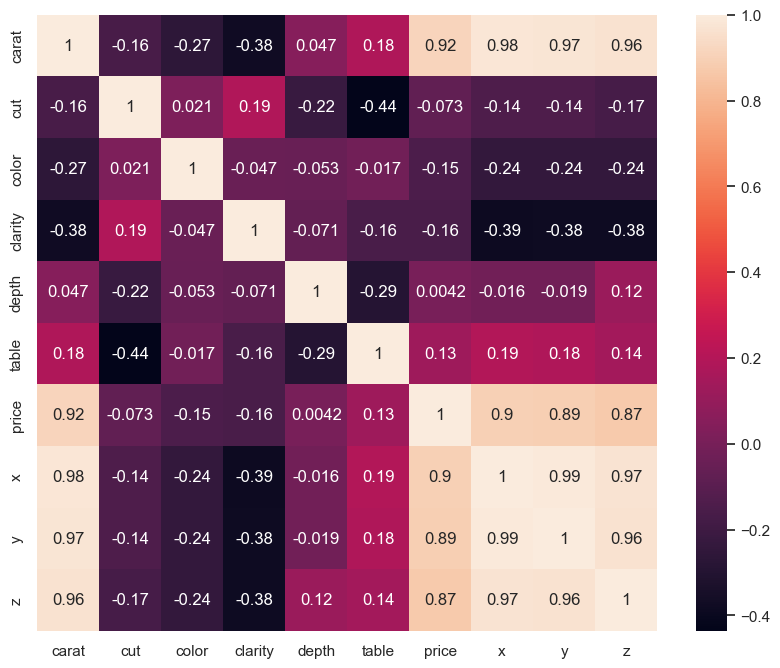

In [34]:
# Create a correlation matrix between every pair of attributes
corr_matrix = df.corr()

# Plot the correlation with seaborn
plt.subplots(figsize = (10, 8))
sns.heatmap(corr_matrix, annot = True)
plt.show()

In [35]:
numeric_df = df.select_dtypes(include=[np.number])
numeric_df = sm.add_constant(numeric_df)

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vif = [vif(numeric_df, i) for i in range(numeric_df.shape[1])]

pd.DataFrame(vif, index=numeric_df.columns, columns=['vif'])

,vif
const,7481.034796
carat,46.457084
cut,1.511502
color,1.321805
clarity,1.807534
depth,1.836547
table,1.592677
price,10.129370
x,101.264460
y,58.096823


In [36]:
def calculate_vif(df):
    # Select only the numeric columns
    numeric_df = df.select_dtypes(include=[np.number])
    numeric_df = sm.add_constant(numeric_df)
    # Calculate VIF values
    vif = np.zeros(numeric_df.shape[1])
    for i in range(numeric_df.shape[1]):
        # extracting the label in loop
        y = numeric_df.iloc[:, i]
        # extracting the all features which is not label
        x = numeric_df.iloc[:, np.arange(numeric_df.shape[1]) != i]
        # fit the  model
        model = LinearRegression().fit(x, y)
        # claculate the R_2
        r_squared = model.score(x, y)
        # calculating VIF
        vif[i] = 1 / (1 - r_squared)

    # Create a DataFrame to store the VIF values
    vif_df = pd.DataFrame({
        "features": numeric_df.columns,
        "VIF": vif
    })

    return vif_df

In [37]:
calculate_vif(df)

,features,VIF
0,const,inf
1,carat,46.457084
2,cut,1.511502
3,color,1.321805
4,clarity,1.807534
5,depth,1.836547
6,table,1.592677
7,price,10.129370
8,x,101.264460
9,y,58.096823


Now, we know that variable, x, y and z are length, height and depth respective. Product of these variables can give one single variable “volume”. We can use the following code to implement the same.
Now, we know that variable, x, y and z are length, height and depth respective. Product of these variables can give one single variable “volume”. We can use the following code to implement the same.

In [38]:
#Reducing three variables x, y, z to a single variable
df['volume']= df['x']*df['y']*df["z"] 
#now we can drop x,y,z columns
df=df.drop(['x','y','z'], axis=1)
#Visualizing the data frame to see the change
df.head()

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,4,5,2,61.5,55.0,326,38.202030
1,0.21,3,5,3,59.8,61.0,326,34.505856
2,0.23,1,5,5,56.9,65.0,327,38.076885
3,0.29,3,1,4,62.4,58.0,334,46.724580
4,0.31,1,0,2,63.3,58.0,335,51.917250


<AxesSubplot:>

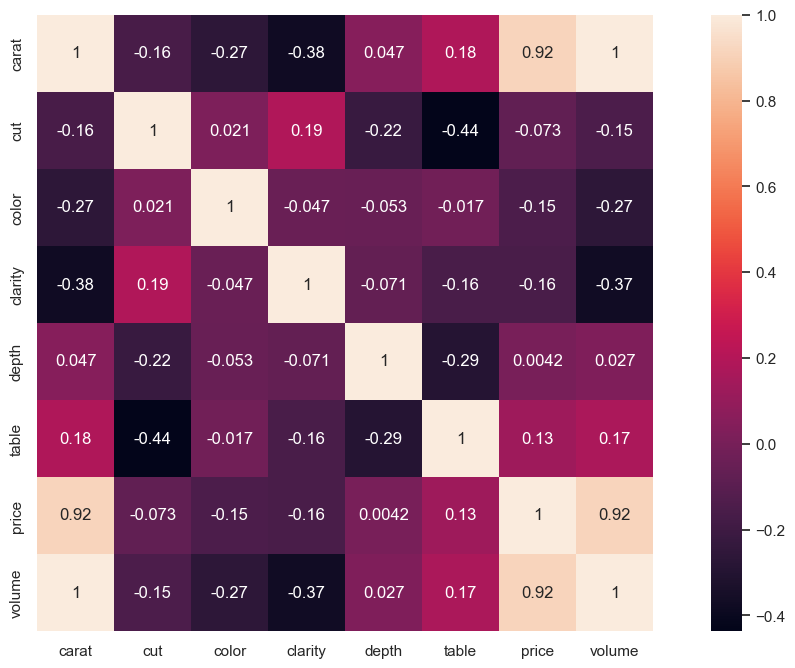

In [39]:
#Plot heat map to see the correlation among the variables
corr = df.corr()
plt.figure(figsize = (15,8)) #To set the figure size
sns.heatmap(data=corr, square=True , annot=True, cbar=True)

In [40]:
def calculate_vif(df):
    # Select only the numeric columns
    numeric_df = df.select_dtypes(include=[np.number])
    numeric_df = sm.add_constant(numeric_df)
    # Calculate VIF values
    vif = np.zeros(numeric_df.shape[1])
    for i in range(numeric_df.shape[1]):
        # extracting the label in loop
        y = numeric_df.iloc[:, i]
        # extracting the all features which is not label
        x = numeric_df.iloc[:, np.arange(numeric_df.shape[1]) != i]
        # fit the  model
        model = LinearRegression().fit(x, y)
        # claculate the R_2
        r_squared = model.score(x, y)
        # calculating VIF
        vif[i] = 1 / (1 - r_squared)

    # Create a DataFrame to store the VIF values
    vif_df = pd.DataFrame({
        "features": numeric_df.columns,
        "VIF": vif
    })

    return vif_df

In [41]:
calculate_vif(df)

,features,VIF
0,const,inf
1,carat,138.723395
2,cut,1.508195
3,color,1.312728
4,clarity,1.794231
5,depth,1.403809
6,table,1.623444
7,price,10.132681
8,volume,130.023665


Since both Carat and volume has high VIF, we'll check for feature significance.

In [42]:
#Define the independent and dependent variables
y= df['price'] #dependent variable is price
x= df.drop(['price'], axis=1)


# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2)


#This is the intercept that has to be added to create the model
x = sm.add_constant(x)

# create the model
modelNew = sm.OLS(y, x)

#fit the model
fitted = modelNew.fit() 

#Obtain the results of regression
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                 6.556e+04
Date:                Wed, 19 Jul 2023   Prob (F-statistic):               0.00
Time:                        09:55:40   Log-Likelihood:            -4.1143e+05
No. Observations:               50260   AIC:                         8.229e+05
Df Residuals:                   50252   BIC:                         8.230e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2995.9313    289.279    -10.357      0.000   -3562.922   -2428.940
carat       6201.0664    115.776     53.561      0.000    5974.144    6427.988
cut           94.3318      4.224     22.331      0.000      86.052     102.611
color        231.4631      2.417     95.784      0.000     226.727     236.200
clarity      396.0461      2.603    152.125      0.000     390.943     401.149
depth        -22.1282      3.215     -6.882      0.000     -28.430     -15.826
table        -11.5185      2.216     -5.198      0.000     -15.862      -7.175
volume         8.5627      0.712     12.023      0.000       7.167       9.959
==============================================================================
Omnibus:                     8473.256   Durbin-Watson:                   0.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           163505.229
Skew:                           0.208   Prob(JB):                         0.00
Kurtosis:                      11.826   Cond. No.                     1.16e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Carat and Volume both are physical features of a Diamond. We can see Carat is more significant feature as it has t value of 53.561 and volume has 12.023 as t value. Thus, we are dropping volume.

In [43]:
df = df.drop('volume', axis=1)

In [44]:
df.head() 

,carat,cut,color,clarity,depth,table,price
0,0.23,4,5,2,61.5,55.0,326
1,0.21,3,5,3,59.8,61.0,326
2,0.23,1,5,5,56.9,65.0,327
3,0.29,3,1,4,62.4,58.0,334
4,0.31,1,0,2,63.3,58.0,335


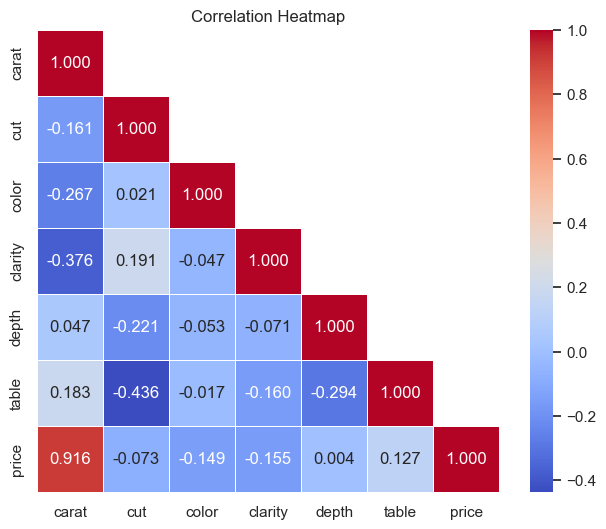

In [45]:
# plotting heatmap
def plot_heatmap():
    from seaborn import heatmap
    
    # define correlation matrix
    corr_df = df.corr(method='pearson')
    df_lt = corr_df.where(np.tril(np.ones(corr_df.shape)).astype(np.bool))
    
    # plot heatmap
    plt.figure(figsize=(8, 6))
    heatmap(data=df_lt, annot=True, square=True, cbar=True, linewidths=.5, fmt='.3f', cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()

plot_heatmap()

# Scaling the data

In [46]:
#Built-in function to standardize the data
from sklearn.preprocessing import StandardScaler
cols=['carat', 'depth','table'] #identifying the columns to be standardized
for i in cols:
#fit the training data with standard scale
    scale = StandardScaler().fit(df[[i]])
# standardize the numerical predictor columns in the dataframe
    df[i] = scale.transform(df[[i]])

In [47]:
df.head()

,carat,cut,color,clarity,depth,table,price
0,-1.287238,4,5,2,-0.178365,-1.087284,326
1,-1.339388,3,5,3,-1.369144,1.605646,326
2,-1.287238,1,5,5,-3.400474,3.400932,327
3,-1.130788,3,1,4,0.452048,0.259181,334
4,-1.078638,1,0,2,1.082461,0.259181,335


In [48]:
df.value_counts()

carat      cut  color  clarity  depth      table      price
-1.078638  4    3      8         0.241910  -1.536106  891      4
-1.104713  4    5      4        -0.178365  -1.087284  844      4
-1.078638  4    6      4        -0.388502  -1.087284  942      4
                                -0.178365  -0.638463  734      4
                                                      942      4
                                                              ..
-0.661438  2    3      3         0.732231  -0.638463  1133     1
                       5        -0.878823   0.887531  1203     1
                       7        -0.808777  -1.087284  1780     1
                4      2         1.082461   0.708002  1058     1
 7.630413  0    2      1         3.744203  -1.984927  11668    1
Length: 49605, dtype: int64

# Linear Regression using Stats Model

In [49]:
#Define the independent and dependent variables
y= df['price'] #dependent variable is price
x= df.drop(['price'], axis=1)

In [50]:
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2)

In [51]:
#This is the intercept that has to be added to create the model
x = sm.add_constant(x)

# create the model
modelNew = sm.OLS(y, x)

#fit the model
fitted = modelNew.fit() 

#Obtain the results of regression
fitted.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                 7.625e+04
Date:                Wed, 19 Jul 2023   Prob (F-statistic):               0.00
Time:                        09:55:41   Log-Likelihood:            -4.1151e+05
No. Observations:               50260   AIC:                         8.230e+05
Df Residuals:                   50253   BIC:                         8.231e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        468.0571     18.976     24.666      0.000     430.864     505.250
carat       2909.3227      4.449    653.910      0.000    2900.602    2918.043
cut           95.4780      4.229     22.576      0.000      87.189     103.767
color        231.5669      2.420     95.691      0.000     226.824     236.310
clarity      396.2919      2.607    152.007      0.000     391.182     401.402
depth        -44.5418      4.468     -9.968      0.000     -53.300     -35.784
table        -35.3793      4.878     -7.254      0.000     -44.939     -25.819
==============================================================================
Omnibus:                     8509.921   Durbin-Watson:                   0.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           165681.389
Skew:                           0.210   Prob(JB):                         0.00
Kurtosis:                      11.885   Cond. No.                         31.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Observation

We can see :

the P value of our F statistic, and conclude that our overall model is significant.

The P valus of our t statistic of every feature, and conclude that all our features are significant.

# Linear Regression (Machine Learning)

In [52]:
#Define the independent and dependent variables
y= df['price'] #dependent variable is price
x= df.drop(['price'], axis=1)

In [53]:
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2)

In [54]:
model = LinearRegression() #Create a linear regression model
model.fit(x_train,y_train) #Fit the data

LinearRegression()

In [55]:
#Predict the value of y based on the test data
y_pred =  model.predict(x_test)

In [56]:
#Obtain the r_squared value

print("r_squared value is ", model.score(x,y))

r_squared value is  0.9010218450062982


In [57]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

# Calculate the mean squared error (MSE)
MSE = mean_squared_error(y_test, y_pred)

# Calculate the root mean squared error (RMSE)
RMSE_LR = np.sqrt(MSE)

# Calculate MAPE for the training data
MAPE_LR = mean_absolute_percentage_error(y_test, y_pred)

# Printing results

print("Mean Absolute Percentage Error", MAPE_LR)
print("Mean Square Error is", MSE)
print("Root Mean Square Error is", RMSE_LR)


Mean Absolute Percentage Error 0.36561918835708085
Mean Square Error is 756681.9961500232
Root Mean Square Error is 869.8747014082104


In [58]:
def calculate_adjusted_r_squared(y_true, y_pred, n_features):
    n = len(y_true)
    residuals = y_true - y_pred
    rss = np.sum(residuals**2)
    tss = np.sum((y_true - np.mean(y_true))**2)
    r_squared = 1 - (rss / tss)
    adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - n_features - 1)
    return adjusted_r_squared

# Calculate the adjusted R-squared value
n_features = x_test.shape[1]  # number of features in the test data
adj_r2 = calculate_adjusted_r_squared(y_test, y_pred, n_features)

print("Adjusted R-squared value is", adj_r2)

Adjusted R-squared value is 0.8997632964588641


# KNN

In [59]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

In [60]:
# Create a KNN regressor and fit the training data
k = 3 # number of nearest neighbors to consider
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(x_train, y_train)

# Predict the target variable for the test data
y_pred = knn.predict(x_test)


r2 = r2_score(y_test, y_pred)
# Evaluate the model performance using mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate the root mean squared error (RMSE)
RMSE_KNN = np.sqrt(mse)

# Evaluate the model performance using mean absolute percentage error
MAPE_KNN = mean_absolute_percentage_error(y_test, y_pred)


#Obtain the r_squared value
print("R-squared value is", r2)
print("Root Mean Square Error is", RMSE_KNN)
print("MSE:", mse)
print("MAPE:", MAPE_KNN)

R-squared value is 0.9522640077040144
Root Mean Square Error is 600.4764173258709
MSE: 360571.9277645135
MAPE: 0.14102769455615308


In [61]:
def calculate_adjusted_r_squared(y_true, y_pred, n_features):
    n = len(y_true)
    residuals = y_true - y_pred
    rss = np.sum(residuals**2)
    tss = np.sum((y_true - np.mean(y_true))**2)
    r_squared = 1 - (rss / tss)
    adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - n_features - 1)
    return adjusted_r_squared

# Calculate the adjusted R-squared value
n_features = x_test.shape[1]  # number of features in the test data
adj_r2 = calculate_adjusted_r_squared(y_test, y_pred, n_features)

print("Adjusted R-squared value is", adj_r2)

Adjusted R-squared value is 0.952235494418422


# Decision tree

In [62]:
from sklearn.tree import DecisionTreeRegressor

In [63]:
# Create a decision tree regressor model and fit the training data
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

# Predict the target variable for the test data
y_pred = dt.predict(x_test)

# Evaluate the model performance using mean squared error and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
RMSE_DT = np.sqrt(mse)
MAPE_DT = mean_absolute_percentage_error(y_test, y_pred)

print("Root Mean Squared Error (RMSE):", RMSE_DT)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)
print("Mean Absolute Percentage Error (MAPE):", MAPE_DT)

Root Mean Squared Error (RMSE): 504.64799329167613
Mean Squared Error: 254669.5971333156
R-squared Score: 0.9662843804781239
Mean Absolute Percentage Error (MAPE): 0.10227197380637895


In [64]:
def calculate_adjusted_r_squared(y_true, y_pred, n_features):
    n = len(y_true)
    residuals = y_true - y_pred
    rss = np.sum(residuals**2)
    tss = np.sum((y_true - np.mean(y_true))**2)
    r_squared = 1 - (rss / tss)
    adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - n_features - 1)
    return adjusted_r_squared

n_features = x_test.shape[1]  # number of features in the test data
adj_r2 = calculate_adjusted_r_squared(y_test, y_pred, n_features)
print("Adjusted R-squared value is", adj_r2)

Adjusted R-squared value is 0.9662642417307739


In [65]:
n_features = x_test.shape[1]  # number of features in the test data
adj_r2 = calculate_adjusted_r_squared(y_test, y_pred, n_features)
print("Adjusted R-squared value is", adj_r2)

Adjusted R-squared value is 0.9662642417307739


# random forest

In [66]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming you have your feature matrix X and target vector y

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a random forest regressor object
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the regressor on the training data
rf_regressor.fit(x_train, y_train)

# Make predictions on the test data
y_pred = rf_regressor.predict(x_test)

# Calculate the mean squared error of the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 148759.51480054262


In [67]:
MAPE_RF = mean_absolute_percentage_error(y_test, y_pred)


print("Mean Absolute Percentage Error (MAPE):", MAPE_RF)

Mean Absolute Percentage Error (MAPE): 0.08293886377612154


In [68]:
def calculate_adjusted_r_squared(y_true, y_pred, n_features):
    n = len(y_true)
    residuals = y_true - y_pred
    rss = np.sum(residuals**2)
    tss = np.sum((y_true - np.mean(y_true))**2)
    r_squared = 1 - (rss / tss)
    adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - n_features - 1)
    return adjusted_r_squared


RMSE_RF = np.sqrt(mse)

# Calculate the number of features
n_features = x_test.shape[1]

# Calculate the adjusted R-squared value
adj_r2 = calculate_adjusted_r_squared(y_test, y_pred, n_features)

# Print the results
print("Root Mean Squared Error (RMSE):", RMSE_RF)
print("Adjusted R-squared value:", adj_r2)

Root Mean Squared Error (RMSE): 385.6935503745721
Adjusted R-squared value: 0.9802426972783118


# Observations

In [69]:

print("MAPE for LR is", MAPE_LR)

print("MAPE for KNN is", MAPE_KNN)

print("MAPE for Decision Tree is", MAPE_DT)

print("MAPE for random forest is", MAPE_RF)

print("We see that Random forest gives us the least MAPE")

MAPE for LR is 0.36561918835708085
MAPE for KNN is 0.14102769455615308
MAPE for Decision Tree is 0.10227197380637895
MAPE for random forest is 0.08293886377612154
We see that Random forest gives us the least MAPE


In [70]:
print("RMSE for LR is", RMSE_LR)

print("RMSE for KNN is", RMSE_KNN)

print("RMSE for Decision Tree is", RMSE_DT)

print("RMSE for random forest is", RMSE_RF)

print("We see that Random forest gives us the least RMSE")

RMSE for LR is 869.8747014082104
RMSE for KNN is 600.4764173258709
RMSE for Decision Tree is 504.64799329167613
RMSE for random forest is 385.6935503745721
We see that Random forest gives us the least RMSE


In [71]:
Metrics_df = pd.DataFrame({
    "Model": ["Linear Regression","KNN",'Decision Tree',"Random Forest"],
    "RMSE": [RMSE_LR, RMSE_KNN, RMSE_DT, RMSE_RF],
    "MAPE": [MAPE_LR, MAPE_KNN, MAPE_DT, MAPE_RF]
})

In [72]:
Metrics_df

,Model,RMSE,MAPE
0,Linear Regression,869.874701,0.365619
1,KNN,600.476417,0.141028
2,Decision Tree,504.647993,0.102272
3,Random Forest,385.693550,0.082939


In [73]:
# Pickle

In [74]:
import pickle

In [75]:
# Assuming you have X_train and y_train as your training features and target variable
model = RandomForestRegressor()
model.fit(x_train, y_train)


RandomForestRegressor()

In [76]:
# Store the trained model in a variable
model = model

In [77]:
# Predict on training set
train_predictions = model.predict(x_train)

# Predict on test set
test_predictions = model.predict(x_test)


In [78]:

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

train_mape = mean_absolute_percentage_error(y_train, train_predictions)
test_mape = mean_absolute_percentage_error(y_test, test_predictions)


In [79]:
print("Train MAPE:", train_mape)
print("Test MAPE:", test_mape)


Train MAPE: 3.676906358055126
Test MAPE: 8.285364306827935


In [80]:
import pickle

In [81]:
# Assuming your trained model is stored in a variable called 'model'
with open('random_forest_model.pickle', 'wb') as file:
    pickle.dump(model, file)


In [79]:
# Store the trained model in a variable
model = model


In [80]:
# Assuming 'X_test' contains the test features and 'y_test' contains the corresponding target variable
predictions = model.predict(x_test)


In [81]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)


In [82]:
mse

148149.90691626733

In [83]:

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, predictions)


In [84]:
mape

8.278835622696523

In [85]:
# Pickle the model and write it to a file
with open('diamond_price_model.pickle', 'wb') as file:
    pickle.dump(model, file)
